In [ ]:
using BitBasis
# using Combinatorics
using Plots
using LinearAlgebra

### note: indices are backwards
# e.g. 0000000111 is nonzero at indices 1, 2, 3, equiv to int 7
# basis for single d atom: ml: 2, 1, 0, -1, -2, 2, 1, 0, -1, -2,
#                          ms: u, u, u,  u,  u, d, d, d,  d,  d
#                         idx: 10, 9, 8, 7,  6, 5, 4, 3,  2,  1

include("tables.jl")
include("params.jl")
include("tools.jl")
k_table = allowed_k_table()
gaunt_table = gaunt_coeff_table()
gaunt_heads = gaunt_coeff_headings()
V_CEF = V_CFE_d_cubic();

In [1]:
include("tools.jl")

XAS_L_edge

Any[4.219999999999996, 4.146105447683633, 4.069524202864962, 3.9906299098681774, 3.9097460919228535, 3.827149953035765, 3.743077480548744, 3.6577288747447243, 3.57127375480914, 3.4838558709398617, 3.395597223225821, 3.306601583674354, 3.216957466058547, 3.1267406084091576, 3.036016037497397, 2.944839781183333, 2.853260287480324, 2.7613196010592334, 2.669054339952218, 2.576496507998121, 2.4836741723110927, 2.39061202976552, 2.297331882098376, 2.20385303562073, 2.110192638584734, 2.016365966858047, 1.9223866666155298, 1.8282669611839903, 1.7340178278995744, 1.639649149801721]


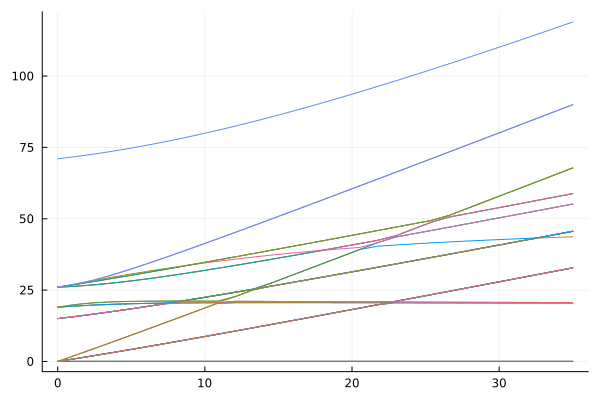

In [4]:
tunabe_sugano_data(2, 10, Fd, Gd);

2.419999999999998


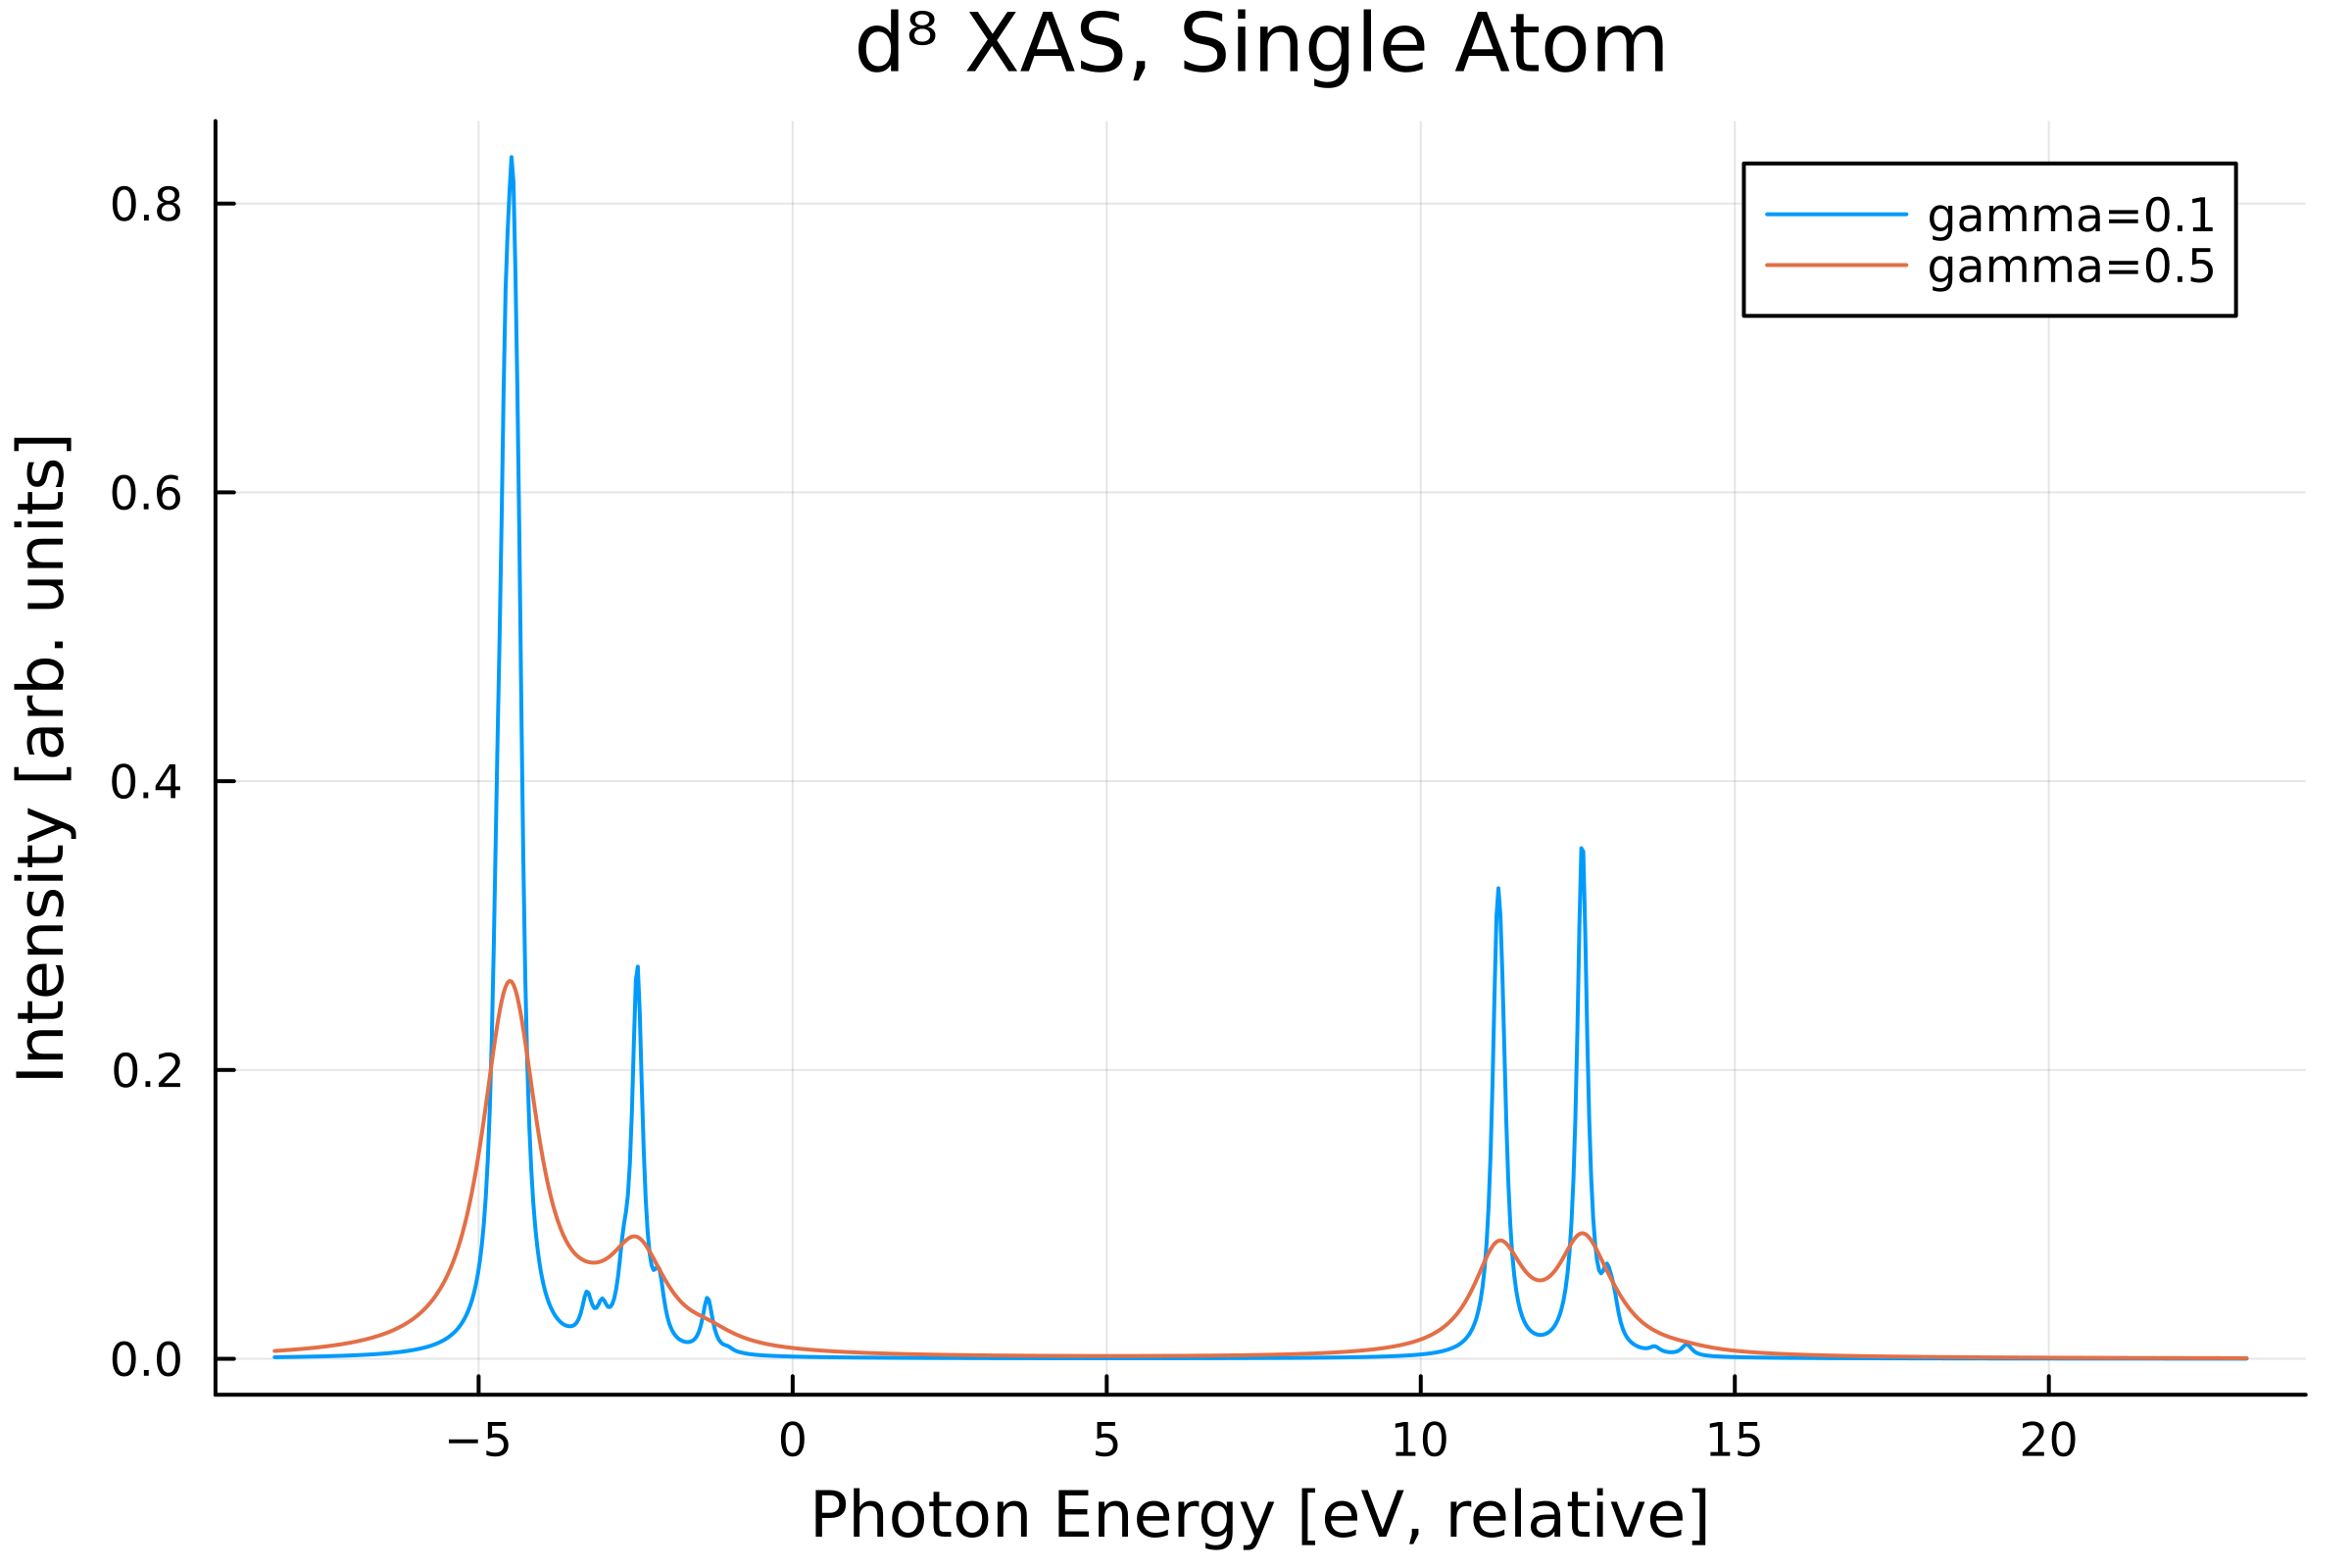

In [6]:
hole_lang = true
x, y = XAS_L_edge(2, [0, 0, 1], Fd, Gd, Dq10=1.5, l_soc=10.5, cef=true, soc=true, cv_int=true, Fcv=Fcv, Gcv=Gcv)
gamma = 0.1
omega = LinRange( -8.24785399267771 , 23.1471460073223 , 1000)
y_plt = zeros(length(omega), 1)
for i in 1:length(omega)
    for j in 1:length(x)
        lorentzian = (gamma/pi) / (gamma^2 + (omega[i] - (x[j]-3*Dq10/5))^2)
        y_plt[i] += y[j] * lorentzian
    end
end

gamma = 0.5
omega = LinRange( -8.24785399267771 , 23.1471460073223 , 1000)
y_plt2 = zeros(length(omega), 1)
for i in 1:length(omega)
    for j in 1:length(x)
        lorentzian = (gamma/pi) / (gamma^2 + (omega[i] - (x[j]-3*Dq10/5))^2)
        y_plt2[i] += y[j] * lorentzian
    end
end

p = plot(omega, [y_plt, y_plt2], fmt = :png, dpi = 400, label=["gamma=0.1" "gamma=0.5"])
# plot!(p, omega, y_plt2)
# legend!(p, )
title!(p, "d⁸ XAS, Single Atom")
xlabel!(p, "Photon Energy [eV, relative]")
ylabel!(p, "Intensity [arb. units]")